In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statistics import mode
from sklearn.metrics import accuracy_score
from joblib import Parallel, delayed
import multiprocessing
import matplotlib
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
import seaborn as sn
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import tensorflow as tf
from tensorflow import keras
#tf.config.list_physical_devices('GPU')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense

#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

from tensorflow.python.client import device_lib
#assert 'GPU' in str(device_lib.list_local_devices())
#print(device_lib.list_local_devices())

# confirm Keras sees the GPU




plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = (8,8)

In [3]:
data=pd.read_csv("19/train.csv",header=None)

In [4]:
Y_train=np.zeros((len(data),4))
data=data.to_numpy()


X_train=data[:,0:2]
labels =data[:,2].astype(int)

for i in range(len(data)):
    Y_train[i,labels[i]]=1

In [5]:
# define the architecture of the network
np.random.seed(42)
model = Sequential()
model.add(Dense(4, input_dim=2, activation='softmax'))
#model.add(Dense(20, activation='relu', kernel_initializer="uniform"))
#model.add(Dense(4, activation='softmax'))


# train the model using SGD
print("[INFO] compiling model...")

# compile the keras model

# sgd = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=["accuracy"])


# fit the keras model on the dataset
model.fit(X_train, Y_train, epochs=30, batch_size=1,verbose=1)


# evaluate the keras model
loss, accuracy = model.evaluate(X_train, Y_train,batch_size=1,verbose=1)
print("\n\n [INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))





[INFO] compiling model...
Epoch 1/30
800/800 [==============================] - 1s 434us/step - loss: 0.8235 - accuracy: 0.7836
Epoch 2/30
800/800 [==============================] - 0s 451us/step - loss: 0.1617 - accuracy: 0.9963
Epoch 3/30
800/800 [==============================] - 0s 419us/step - loss: 0.1054 - accuracy: 0.9942
Epoch 4/30
800/800 [==============================] - 0s 428us/step - loss: 0.0716 - accuracy: 1.0000
Epoch 5/30
800/800 [==============================] - 0s 432us/step - loss: 0.0532 - accuracy: 1.0000
Epoch 6/30
800/800 [==============================] - 0s 434us/step - loss: 0.0471 - accuracy: 1.0000
Epoch 7/30
800/800 [==============================] - 0s 441us/step - loss: 0.0418 - accuracy: 1.0000
Epoch 8/30
800/800 [==============================] - 0s 422us/step - loss: 0.0367 - accuracy: 1.0000
Epoch 9/30
800/800 [==============================] - 0s 430us/step - loss: 0.0359 - accuracy: 1.0000
Epoch 10/30
800/800 [==============================] - 0

In [6]:
data=pd.read_csv("19/dev.csv",header=None)
data=data.to_numpy()

X_valid=data[0:60,0:2]
labels_valid=data[0:60,2].astype(int)

X_test=data[60:120,0:2]
labels_test=data[60:120,2].astype(int)


Y_valid=np.zeros((len(X_valid),4))
Y_test=np.zeros((len(X_test),4))


for i in range(len(X_valid)):
    Y_valid[i,labels_valid[i]]=1

    
for i in range(len(X_test)):
    Y_test[i,labels_test[i]]=1


In [7]:
loss, accuracy = model.evaluate(X_valid, Y_valid,batch_size=10,verbose=1)
print("\n\n [INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

6/6 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 1.0000


 [INFO] loss=0.0070, accuracy: 100.0000%


In [8]:
loss, accuracy = model.evaluate(X_test, Y_test,batch_size=10,verbose=1)
print("\n\n [INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

6/6 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 1.0000


 [INFO] loss=0.0070, accuracy: 100.0000%


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


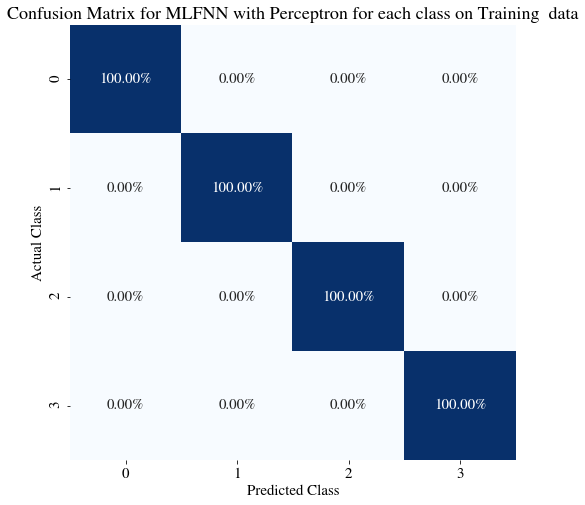

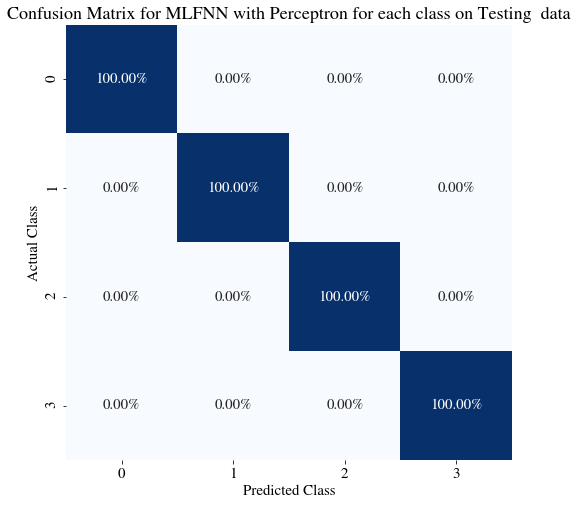

In [10]:
predicted_train =np.argmax(model.predict(X_train), axis=-1)
confuse=confusion_matrix(labels,predicted_train)

sn.heatmap(confuse/np.sum(confuse,axis=0), annot=True,
    fmt='.2%', cmap='Blues',cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel("Actual Class")
plt.title('Confusion Matrix for MLFNN with Perceptron for each class on Training  data')
#plt.savefig("MLFNN_Confusion_1.png")

plt.show()

predicted_test =np.argmax(model.predict(X_test), axis=-1)
confuse=confusion_matrix(labels_test,predicted_test)

sn.heatmap(confuse/np.sum(confuse,axis=0), annot=True,
    fmt='.2%', cmap='Blues',cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel("Actual Class")
plt.title('Confusion Matrix for MLFNN with Perceptron for each class on Testing  data')
#plt.savefig("MLFNN_Confusion_2.png")

plt.show()



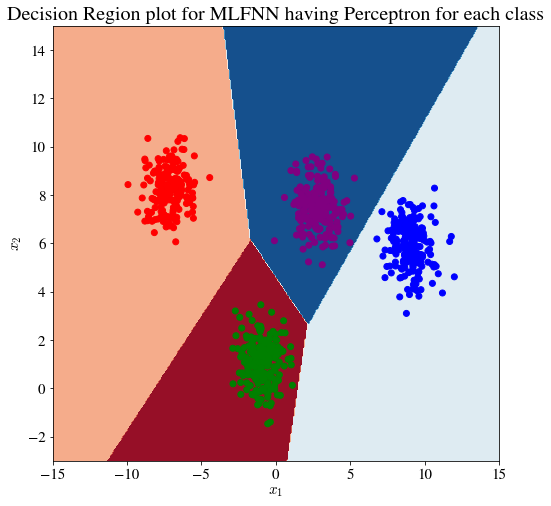

In [11]:
x1=np.linspace(-15,15,num=350)
x2=np.linspace(-3,15,num=350)
xx1, xx2 = np.meshgrid(x1, x2)
r1, r2 = xx1.flatten(), xx2.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))


predicted=np.argmax(model.predict(grid),axis=1)


predicted=predicted.reshape(xx1.shape)
fig = plt.figure(figsize=(8,8))
plt.contourf(xx1, xx2, predicted, cmap='RdBu')
colors = ['green','red','blue','purple']
Y_train=pd.read_csv("19/train.csv",header=None)
Y_train=Y_train.to_numpy()
Y_train=Y_train[:,-1]
plt.scatter(X_train[:,0], X_train[:,1], c= Y_train, cmap=matplotlib.colors.ListedColormap(colors))


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Decision Region plot for MLFNN having Perceptron for each class',fontsize=20)

"""recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,unique,loc=4)
"""

#plt.savefig('MLFNN_Decision.png')
plt.show()
#plt.close()

3829/3829 [==============================] - 1s 314us/step


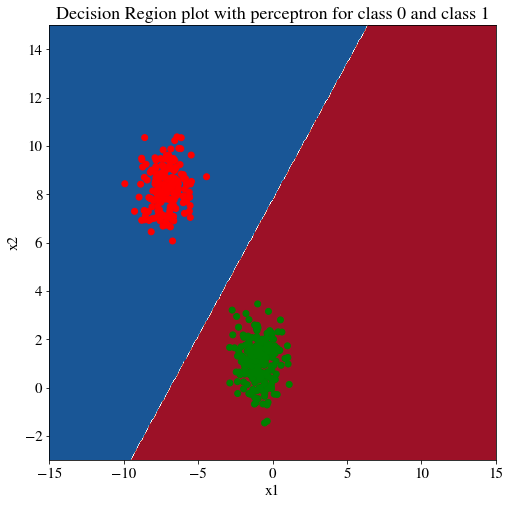

13/13 [==============================] - 0s 499us/step


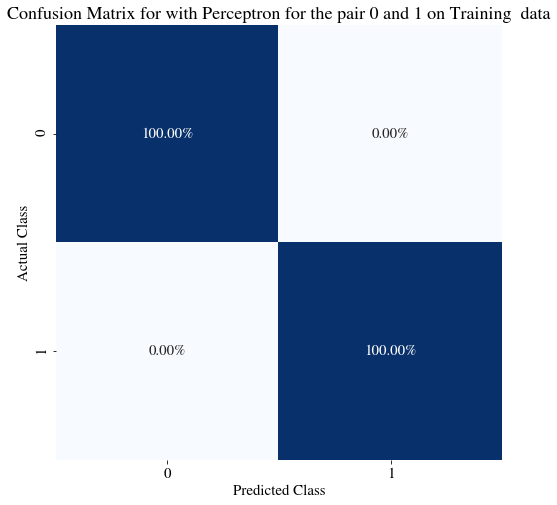

1/1 [==============================] - 0s 12ms/step


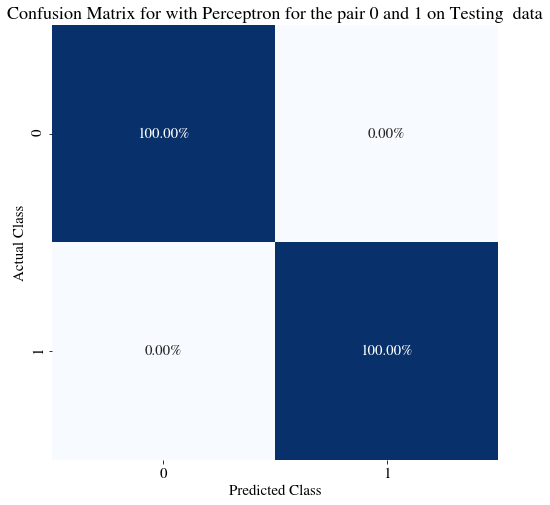

3829/3829 [==============================] - 1s 314us/step


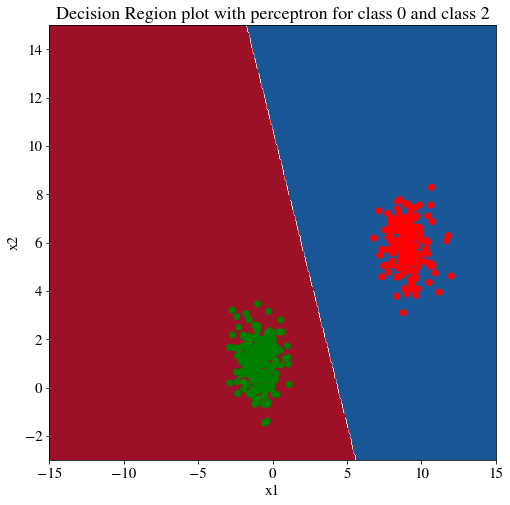

13/13 [==============================] - 0s 416us/step


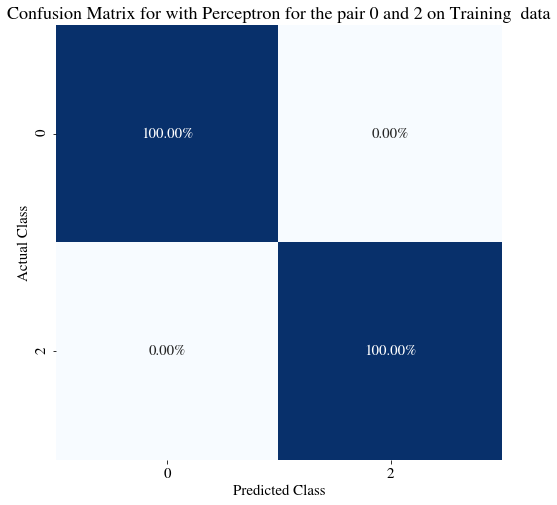

1/1 [==============================] - 0s 12ms/step


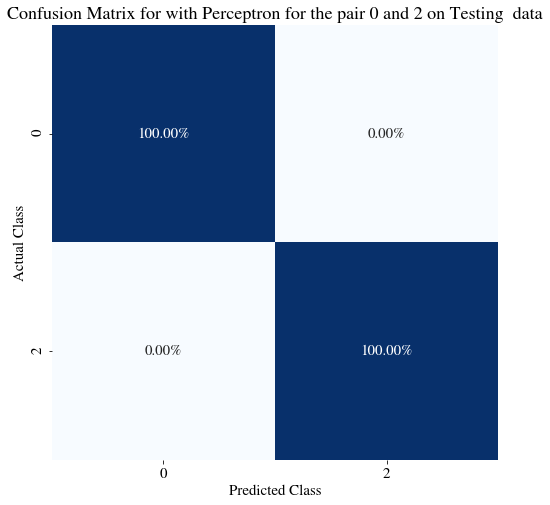

3829/3829 [==============================] - 1s 321us/step


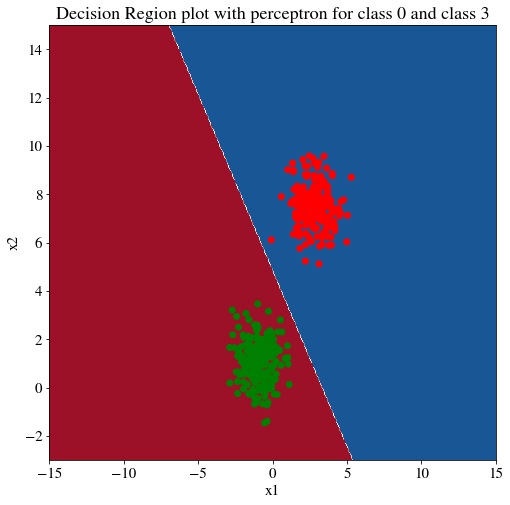

13/13 [==============================] - 0s 834us/step


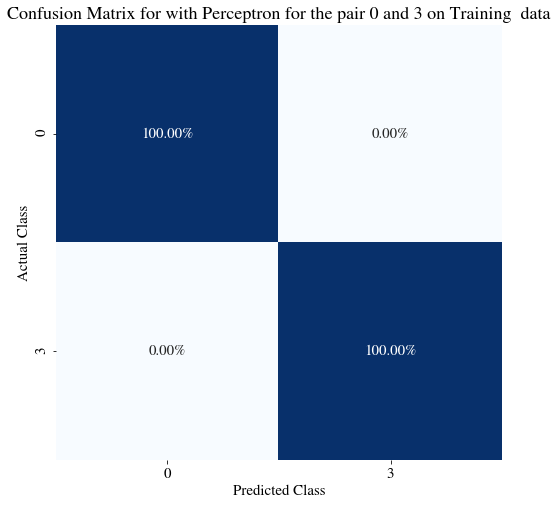

1/1 [==============================] - 0s 12ms/step


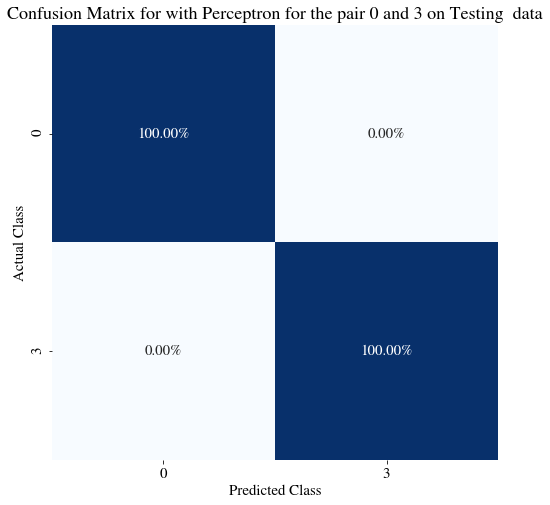

3829/3829 [==============================] - 1s 314us/step


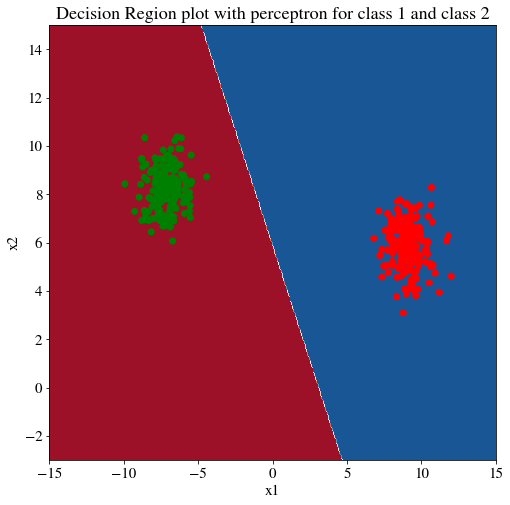

13/13 [==============================] - 0s 499us/step


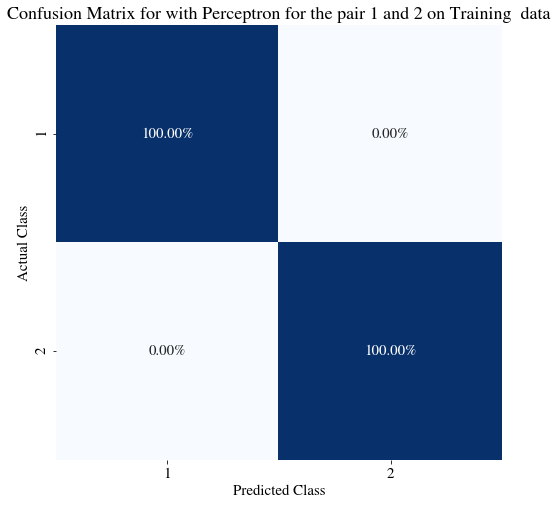

1/1 [==============================] - 0s 12ms/step


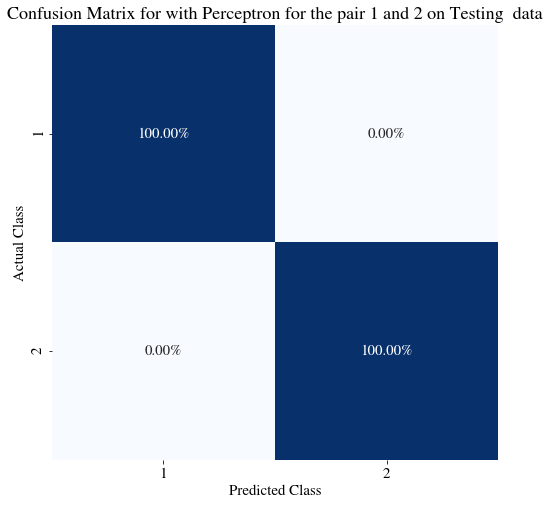

3829/3829 [==============================] - 1s 321us/step


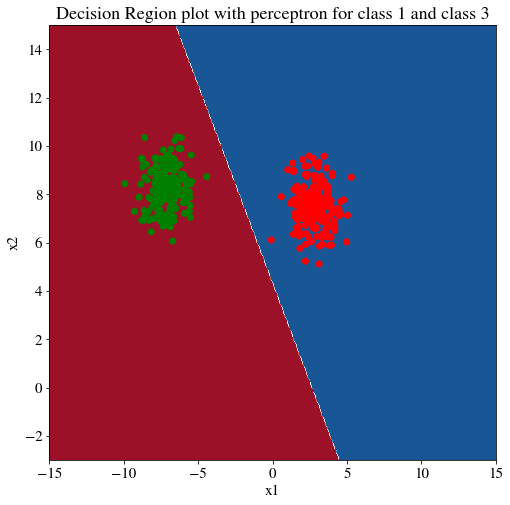

13/13 [==============================] - 0s 501us/step


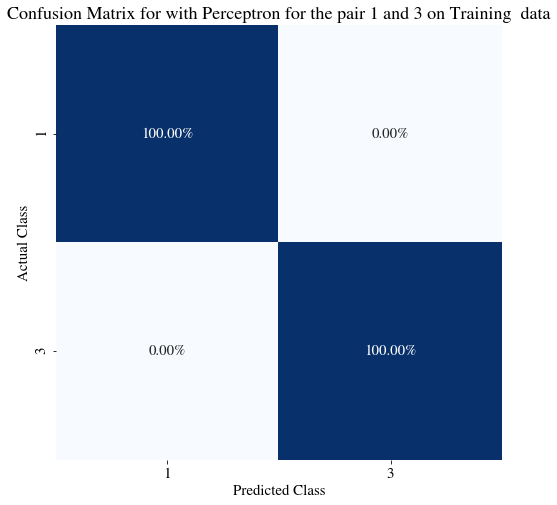

2/2 [==============================] - 0s 2ms/step


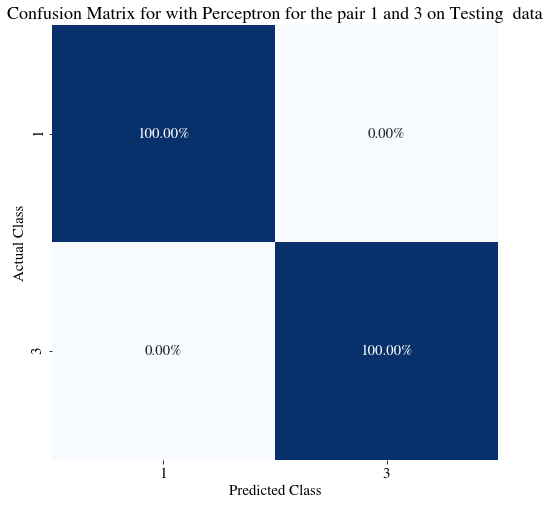

3829/3829 [==============================] - 1s 322us/step


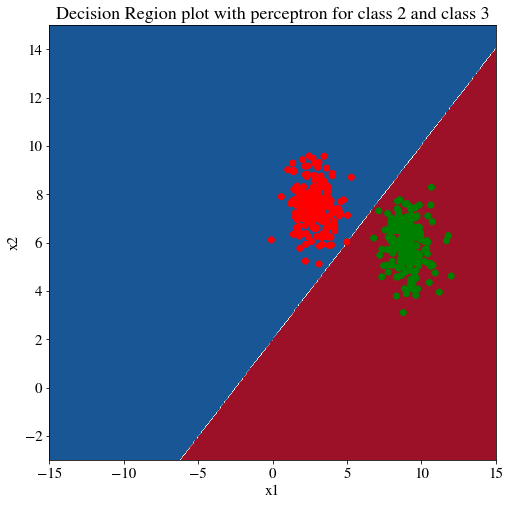

13/13 [==============================] - 0s 501us/step


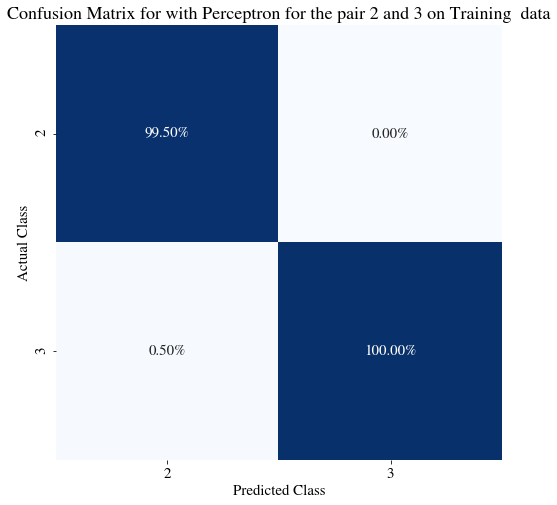

1/1 [==============================] - 0s 10ms/step


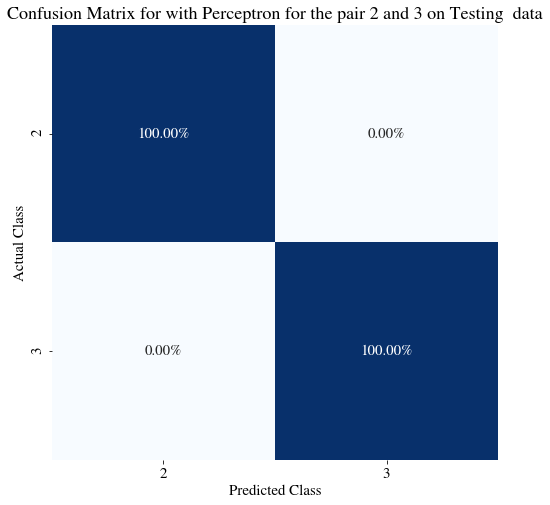

In [36]:
(unique, counts) = np.unique(Y_train, return_counts=True)
#print(unique)
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))



# sgd = SGD(lr=0.01)
model.compile(loss="binary_crossentropy", optimizer='sgd', metrics=["accuracy"])


data=pd.read_csv("19/dev.csv",header=None)
data=data.to_numpy()

X_valid=data[0:60,0:2]
Y_valid=data[0:60,2]

X_test=data[60:120,0:2]
Y_test=data[60:120,2]



for i in range(len(unique)):
    for p in range(i+1,len(unique)):
        #print(Y_train[np.where(Y_train==0)].shape)
        X_new_train=X_train[np.where(Y_train==i)]
        X_new_train=np.vstack((X_new_train,X_train[np.where(Y_train==p)]))
        #print(X_new_train.shape)
        Y_new_train=np.hstack((np.zeros_like(Y_train[np.where(Y_train==i)]),np.ones_like(Y_train[np.where(Y_train==p)])))
        #print(Y_new_train)
        #clf.fit(X_new_train, Y_new_train)
        model.fit(X_new_train, Y_new_train, epochs=18, batch_size=1,verbose=0)
        x1=np.linspace(-15,15,num=350)
        x2=np.linspace(-3,15,num=350)
        xx1, xx2 = np.meshgrid(x1, x2)
        r1, r2 = xx1.flatten(), xx2.flatten()
        r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        grid = np.hstack((r1,r2))
        #print(grid)
        #predicted.clear()
        #print(Y_new_train)

        #predicted = Parallel(n_jobs=num_cores)(delayed(predict_covdif)(grid[i],means,covdif,counts) for i in range(grid.shape[0]))
        predicted=model.predict(grid,verbose=1)
        #print(predicted)
        predicted_new=[]
        for a in predicted:
            predicted_new.append(a>=0.5)
        predicted=predicted_new
        pos=np.empty(xx1.shape+(2,))
        pos[:,:,0]=xx1
        pos[:,:,1]=xx2
        #print(predicted)

        predicted=np.array(predicted)
        predicted=predicted.reshape(xx1.shape)
        fig = plt.figure(figsize=(8,8))
        plt.contourf(xx1, xx2, predicted, cmap='RdBu')
        colors = ['green','red']
        #real=X_new_train[~np.in1d(X_new_train[:,0],clf.support_vectors_[:,0])]
        plt.scatter(X_new_train[:,0], X_new_train[:,1], c=Y_new_train, cmap=matplotlib.colors.ListedColormap(colors))
        #plt.scatter(np.setdiff1d(X_train[:,0],clf.support_vectors_[:,0]), np.setdiff1d(X_train[:,1],clf.support_vectors_[:,1]), c=Y_train, cmap=matplotlib.colors.ListedColormap(colors))
        #plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap='RdBu')
        #plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], marker='x',label="Support Vectors",color='black')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.title(f'Decision Region plot with perceptron for class {i} and class {p}')
        #plt.legend()
        #plt.savefig('plot_Gaussian_2.png')
        plt.show()
        
        predicted=model.predict(X_new_train,verbose=1)
        #print(predicted)
        predicted_new=[]
        for a in predicted:
            predicted_new.append(a>=0.5)
        predicted=predicted_new
        
        confuse=confusion_matrix(Y_new_train,predicted)

        sn.heatmap(confuse/np.sum(confuse,axis=0), annot=True,
            fmt='.2%', cmap='Blues',cbar=False,xticklabels=[i,p],yticklabels=[i,p])
        plt.xlabel('Predicted Class')
        plt.ylabel("Actual Class")
        plt.title(f'Confusion Matrix for with Perceptron for the pair {i} and {p} on Training  data')
        #plt.savefig("MLFNN_Confusion_2.png")

        plt.show()
        
        X_new_test=X_test[np.where(Y_test==i)]
        X_new_test=np.vstack((X_new_test,X_test[np.where(Y_test==p)]))
        #print(X_new_train.shape)
        Y_new_test=np.hstack((np.zeros_like(Y_test[np.where(Y_test==i)]),np.ones_like(Y_test[np.where(Y_test==p)])))
        
        predicted=model.predict(X_new_test,verbose=1)
        #print(predicted)
        predicted_new=[]
        for a in predicted:
            predicted_new.append(a>=0.5)
        predicted=predicted_new
        
        confuse=confusion_matrix(Y_new_test,predicted)

        sn.heatmap(confuse/np.sum(confuse,axis=0), annot=True,
            fmt='.2%', cmap='Blues',cbar=False,xticklabels=[i,p],yticklabels=[i,p])
        plt.xlabel('Predicted Class')
        plt.ylabel("Actual Class")
        plt.title(f'Confusion Matrix for with Perceptron for the pair {i} and {p} on Testing  data')
        #plt.savefig("MLFNN_Confusion_2.png")

        plt.show()
        
        
    
